In [1]:
import dasslc, time
import numpy as np
import matplotlib.pyplot as plt
import csv
#import doepy as dp
from doepy import build
#from pyDOE2 import *
import pandas as pd
import openpyxl as xl


In [2]:
def modelo(t,y,yp,par): 
    res = np.empty(3)
         
    Ff= par[0] 
    V= par[1]                                               
    Te= par[2]
    Tej= par[3]
    k0= par[4]
    Ca0= par[5]
    RhoCp= par[6]
    Hrec= par[7]
    U= par[8]
    A= par[9]
    Ea= par[10]
    R= par[11]
    Vj= par[12]
    RhoCpj= par[13]
    Ffj= par[14]
     
    Ca = y[0]; dCa = yp[0]      
    T = y[1]; dT = yp[1] 
    Tj = y[2]; dTj = yp[2]
    
    res[0] = (Ca0 - Ca)*(Ff/V) - k0*Ca*np.exp(-Ea/(R*T)) - dCa
    res[1] = (Te - T)*(Ff/V) - (k0*Ca/RhoCp)*np.exp(-Ea/(R*T))*Hrec + (U*A/(V*RhoCpj))*(Tj - T)  - dT  
    res[2] = (Tej - Tj)*(Ffj/Vj) + (U*A/(Vj*RhoCpj))*(T-Tj) - dTj
    ires = 0
    return res, ires

In [3]:
t0 = np.array([1])

y0 = np.array([2,273.15 + 38,273.15 -18.15]) # Voltar e gerar dados com variação do PVI

Ea = 75500                #KJ/Kmol
k0 = 1.696e12             #1/h
Hrec = -89700             #KJ/Kmol                                Matriz Sensibilidade
A = 40                    #m^2
U = 1100                  #KJ/(K*mol*m^2)
RhoCp = 3570              #KJ/K*m^3
R = 8.3144621             #KJ/Kmol*K
V = 14                    #m^3
Ff = (V / 0.25)           #m^3/h          Fluxo do reator         Matriz Sensibilidade
Ca0 = 2                   #Kmol/m^3
Te = (273.15 + 16)        #K  Detalhe: Temperatura operacional    Matriz Sensibilidade
Vj = 0.25*V               #m^3
Tej = (273.15 - 17)       #K                                      Matriz Sensibilidade
RhoCpj = 3700             #KJ/K*m^3
T0 = (273.15 + 38)        #K
Ffj = 2.032484            #m^3/h                                  Matriz Sensibilidade
Tj0 = (273.15 - 18.15)    #K
# fluxo entrada(e) = fluxo saída(f)
yp0 = np.array([0,0,0])    # Steady State, para alguns critérios será necessário mudança
par = np.array([Ff,V,Te,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
atol = 1e-10
rtol = 1e-23 

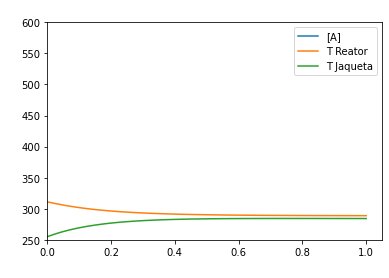

In [4]:
t, y, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

# Plot results
plt.figure()
plt.plot(t,y)
x1,x2,y1,y2 = plt.axis()

plt.axis((0,x2,250,600))
plt.ylabel('Temperatura(K) ou Kmol/m^3', color = 'white')
plt.xlabel('tempo(h)', color = 'white')
plt.title('Balanço Reator CSTR com Jaqueta', color = 'white')
plt.legend(["[A]","T Reator","T Jaqueta"])

In [5]:
y

array([[  2.        , 311.15      , 255.        ],
       [  1.99328423, 309.98837966, 256.87565563],
       [  1.9875363 , 308.87995799, 258.63925759],
       [  1.98261918, 307.82374871, 260.2969934 ],
       [  1.97841694, 306.81847208, 261.85476847],
       [  1.97483121, 305.86263295, 263.3182087 ],
       [  1.9717783 , 304.95458363, 264.69266536],
       [  1.96918682, 304.09257416, 265.98322165],
       [  1.96699571, 303.27479234, 267.19470053],
       [  1.96515257, 302.4993954 , 268.33167342],
       [  1.96361232, 301.76453472, 269.39846955],
       [  1.96233607, 301.06837519, 270.3991856 ],
       [  1.96129019, 300.40911001, 271.3376956 ],
       [  1.96044549, 299.78497192, 272.21766086],
       [  1.95977661, 299.19424157, 273.04253979],
       [  1.95926144, 298.63525351, 273.81559766],
       [  1.95888067, 298.10640041, 274.53991607],
       [  1.95861739, 297.60613572, 275.21840218],
       [  1.95845679, 297.13297523, 275.85379768],
       [  1.95838582, 296.68549

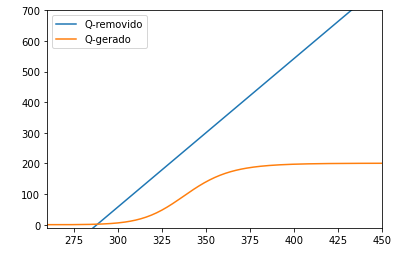

In [6]:
#Para mudança da temperatura do reator com Temp da jaqueta cte
T = np.array(range(100,1000))
Tj = Tej + 27 #dessa forma estamos fixando Tj em 10°C
Ca = (Ff*Ca0)/(Ff+V*k0*np.exp(-Ea/(R*T))) # Integração do balanço de massa

Qr = -(Te - T)*(Ff/V) - (U*A/(V*RhoCpj))*(Tj - T)
Qm =  - (k0*(Ca)/RhoCp)*np.exp(-Ea/(R*T))*Hrec
plt.plot(T,Qr)
plt.plot(T,Qm)
plt.legend(['Q-removido','Q-gerado'])
plt.ylabel('Calor(KJ)', color = 'white')
plt.xlabel('Temperatura(K)', color = 'white')
plt.axis((260,450,-10,700))
plt.show()

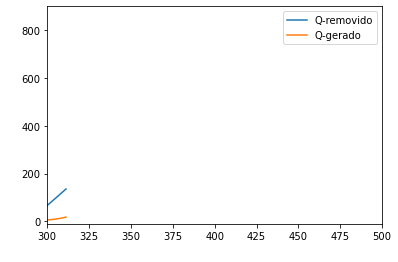

In [10]:
# DIAGRAMA DE SEMENOV PARA O REATOR
T = np.array(y.T[1])
Tj = np.array(y.T[2]) 
Ca = np.array(y.T[0])

Qr = -(Te - T)*(Ff/V) - (U*A/(V*RhoCpj))*(Tj - T)
Qm =  - (k0*(Ca)/RhoCp)*np.exp(-Ea/(R*T))*Hrec
plt.plot(T,Qr)
plt.plot(T,Qm)
plt.legend(['Q-removido','Q-gerado'])
plt.ylabel('Calor(KJ)', color = 'white')
plt.xlabel('Temperatura(K)', color = 'white')
plt.axis((300,500,-10,900))
plt.show()

In [8]:
#para Sensibilidade de 5%
par = np.array([Ff*1.05,V,Te,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y5Fr, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [9]:
#para Sensibilidade de 5%
par = np.array([Ff,V,Te*1.05,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y5Tr, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [10]:
#para Sensibilidade de 5%
par = np.array([Ff,V,Te,Tej*1.05,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y5Tj, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [11]:
#para Sensibilidade de 5%
par = np.array([Ff,V,Te,Tej,k0,Ca0,RhoCp,Hrec*1.05,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y5Hrec, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [12]:
#para Sensibilidade de 5%
par = np.array([Ff,V,Te,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj*1.05])
t, y5Fj, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [13]:
S5=      ([(y5Fr[29][0]-y[29][0])/(Ff*1.05-Ff) , (y5Tr[29][0]-y[29][0])/(0.05*Te),
         (y5Tj[29][0]-y[29][0])/(0.05*Tej)   , (y5Hrec[29][0]-y[29][0])/(0.05*Hrec),
         (y5Fj[29][0]-y[29][0])/(0.05*Ffj)]  ,      #linha 1; dC/dFr dC/dTr dC/dTj dC/dHrec dC/dFj
        
        [(y5Fr[29][1]-y[29][1])/(Ff*0.05) , (y5Tr[29][1]-y[29][1])/(0.05*Te),
         (y5Tj[29][1]-y[29][1])/(0.05*Tej)   , (y5Hrec[29][1]-y[29][1])/(0.05*Hrec),
         (y5Fj[29][1]-y[29][1])/(0.05*Ffj)]  ,      #Linha 2; dTr/dFr dTr/dTr dTr/dTj dTr/dHrec dTr/dFj
        
        [(y5Fr[29][2]-y[29][2])/(Ff*0.05) , (y5Tr[29][2]-y[29][2])/(0.05*Te),
         (y5Tj[29][2]-y[29][2])/(0.05*Tej)   , (y5Hrec[29][2]-y[29][2])/(0.05*Hrec),
         (y5Fj[29][2]-y[29][2])/(0.05*Ffj)])       #Linha 3; dTj/dFr dTj/dTr dTj/dTj dTj/dHrec dTj/dFj
S5

([0.0007759608463205245,
  -0.002157709016874198,
  -1.4307757387905638e-05,
  3.591960269824008e-08,
  6.880800194417655e-05],
 [-0.10949875148457164,
  0.6951101850740826,
  0.009896419839392882,
  -1.0995393765753726e-05,
  -0.06481127749062252],
 [-0.06024004170088557,
  0.28130906427661806,
  0.10342104779332989,
  -6.09353198359923e-06,
  -0.8872873312889462])

In [14]:
#para Sensibilidade de 10%
par = np.array([Ff*1.1,V,Te,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y10Fr, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [15]:
#para Sensibilidade de 10%
par = np.array([Ff,V,Te*1.1,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y10Tr, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [16]:
#para Sensibilidade de 10%
par = np.array([Ff,V,Te,Tej*1.1,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y10Tj, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [17]:
#para Sensibilidade de 10%
par = np.array([Ff,V,Te,Tej,k0,Ca0,RhoCp,Hrec*1.1,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y10Hrec, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [18]:
#para Sensibilidade de 10%
par = np.array([Ff,V,Te,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj*1.1])
t, y10Fj, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 

In [19]:
S10=     ([(y10Fr[29][0]-y[29][0])/(Ff*1.1-Ff) , (y10Tr[29][0]-y[29][0])/(0.1*Te),
         (y10Tj[29][0]-y[29][0])/(0.1*Tej)   ,   (y10Hrec[29][0]-y[29][0])/(0.1*Hrec),
         (y10Fj[29][0]-y[29][0])/(0.1*Ffj)]  ,   
        
        [(y10Fr[29][1]-y[29][1])/(Ff*0.1) ,      (y10Tr[29][1]-y[29][1])/(0.1*Te),
         (y10Tj[29][1]-y[29][1])/(0.1*Tej)   ,   (y10Hrec[29][1]-y[29][1])/(0.1*Hrec),
         (y10Fj[29][1]-y[29][1])/(0.1*Ffj)]  ,
        
        [(y10Fr[29][2]-y[29][2])/(Ff*0.1) ,      (y10Tr[29][2]-y[29][2])/(0.1*Te),
         (y10Tj[29][2]-y[29][2])/(0.1*Tej)   ,   (y10Hrec[29][2]-y[29][2])/(0.1*Hrec),
         (y10Fj[29][2]-y[29][2])/(0.1*Ffj)])
S10

([0.0007488202672268578,
  -0.0033496757689376665,
  -1.4365090439019465e-05,
  3.611219884933234e-08,
  6.868688506928823e-05],
 [-0.10607679441560791,
  0.7236143353989325,
  0.009897803336695982,
  -1.1042142652495578e-05,
  -0.06468035063763133],
 [-0.059018162583726046,
  0.28859411463918694,
  0.10342132110848447,
  -6.1148770993219815e-06,
  -0.8849813935567843])

In [20]:
# CRITÉRIO DE SEMENOV
inicio = time.time()
par = np.array([Ff,V,Te,Tej,k0,Ca0,RhoCp,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj])
t, y, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol)  
T = np.array(y.T[1])
Tj = np.array(y.T[2]) 
Ca = np.array(y.T[0])

Qr = -(Te - T)*(Ff/V) - (U*A/(V*RhoCpj))*(Tj - T)
Qm =  - (k0*(Ca)/RhoCp)*np.exp(-Ea/(R*T))*Hrec
    
for u in range(0,100):
    if Qm[u] > Qr[u] and T[u] > (273+300):
        Semenov = 1
    else:
        Semenov = 0
        
# PARA PRINTAR OS RESULTADOS EM CSV        
with open(r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\Dado.csv', 'w', newline='') as outfile:
    w = csv.writer(outfile, delimiter=';')
    w.writerow(['Tempo','Conc','T_Reator','T_Jaqueta','Ff','V','Te','Tej','k0','Ca0','RhoCp'
                ,'Hrec','U','A','Ea','R','Vj','RhoCpj','Ffj','Semenov'])
         
    for i in range(0,100): 
        w.writerow([t[i]*60,y[i][0],y[i][1],y[i][2],Ff,V,Te,Tej,k0,Ca0,RhoCp
                    ,Hrec,U,A,Ea,R,Vj,RhoCpj,Ffj,Semenov])
fim = time.time()
print(fim - inicio)

0.02090167999267578


In [4]:
#Full factorial design:
FAC_Ff = []
FAC_V = [V]             #
FAC_Te = []
FAC_Tej = []
FAC_k0 = [k0]              # 
FAC_Ca0 = []
FAC_RhoCp = [RhoCp]        # 
FAC_Hrec = []            
FAC_U = [U]            #
FAC_A = [A]            #
FAC_Ea = [Ea]           #
FAC_R = [R]             #
FAC_Vj = [Vj]           #
FAC_RhoCpj = [RhoCpj]   #
FAC_Ffj = []

for v in range(0,6):         # Porcentagem 0.75 // 1.00 // 1.41 // 1.914 // 2.491 // 3.13     
    FAC_Ff.append(Ff*(0.75 + 0.25*v**1.4))
    
    FAC_Te.append(Te*(1 + 0.035*v))     # Celcius:  16.15 // 26.12 // 36.24 // 46.51 // 56.48 // 66.6
    FAC_Tej.append(Tej*(1 + 0.04*v))  # Celcius: -18.85 // -6.6 // 3.64 // 13.89 // 24.13 // 34.4
    
    FAC_Ca0.append(Ca0*(0.75 + 0.25*v**1.4))
    FAC_Hrec.append(Hrec*(0.75 + 0.25*v**1.4))
    FAC_Ffj.append(Ffj*(0.75 + 0.25*v**1.4))    



FullFac = build.full_fact(
{ 'Ff':FAC_Ff
 ,'V':FAC_V
 ,'Te':FAC_Te
 ,'Tej':FAC_Tej
 ,'k0':FAC_k0
 ,'Ca0':FAC_Ca0
 ,'RhoCp':FAC_RhoCp
 ,'Hrec':FAC_Hrec
 ,'U':FAC_U
 ,'A':FAC_A
 ,'Ea':FAC_Ea
 ,'R':FAC_R
 ,'Vj':FAC_Vj
 ,'RhoCpj':FAC_RhoCpj
 ,'Ffj':FAC_Ffj }
)
FullFac.to_csv (r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\InputReduzidoFinal.csv', index = False,sep=';', header=True)


In [10]:

FullFact=fullfact([10, 1, 10,10,10,10,1,10, 1, 1, 1, 1 ,1,1,10])
with open(r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\Input_FullFact.csv', 'w', newline='') as outfile:
    w = csv.writer(outfile, delimiter=';')
    w.writerow(['Ff','V','Te','Tej','k0','Ca0','RhoCp'
                ,'Hrec','U','A','Ea','R','Vj','RhoCpj','Ffj'])
    w.writerows(FullFact)

In [36]:
FullFac.info

<bound method DataFrame.info of                Ff     V          Te         Tej            k0   Ca0   RhoCp  \
0      165.199997  14.0  852.992493  755.642517  1.696000e+12  5.90  3570.0   
1      165.759995  14.0  852.992493  755.642517  1.696000e+12  5.90  3570.0   
2      166.320007  14.0  852.992493  755.642517  1.696000e+12  5.90  3570.0   
3      166.880005  14.0  852.992493  755.642517  1.696000e+12  5.90  3570.0   
4      167.440002  14.0  852.992493  755.642517  1.696000e+12  5.90  3570.0   
...           ...   ...         ...         ...           ...   ...     ...   
15620  165.199997  14.0  864.558472  765.888489  1.696000e+12  5.98  3570.0   
15621  165.759995  14.0  864.558472  765.888489  1.696000e+12  5.98  3570.0   
15622  166.320007  14.0  864.558472  765.888489  1.696000e+12  5.98  3570.0   
15623  166.880005  14.0  864.558472  765.888489  1.696000e+12  5.98  3570.0   
15624  167.440002  14.0  864.558472  765.888489  1.696000e+12  5.98  3570.0   

           Hrec    

In [4]:
inicio = time.time()
k = 0
#ESCRITA DA HEADLINE SEGUIDA DE LEITURA DO INPUT
with open(r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut_Reduzido_Final.csv', 'a', newline='') as outfile:
    w = csv.writer(outfile, delimiter=';')  
    w.writerow(['K','Tempo', 'Conc', 'T_Reator', 'T_Jaqueta','Ff','V','Te','Tej','k0','Ca0','RhoCp'
                ,'Hrec','U','A','Ea','R','Vj','RhoCpj','Ffj','Qm','Qr','Semenov','T_Limite'])
CSV = pd.read_csv(r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\InputReduzidoFinal.csv', sep=';', header=0)


#CICLOS DE ESCRITA DE CADA RODADA
for v in range(0,46656):
    par = np.array([CSV['Ff'][v],CSV['V'][v],CSV['Te'][v],CSV['Tej'][v],CSV['k0'][v],CSV['Ca0'][v],CSV['RhoCp'][v]
                    ,CSV['Hrec'][v],CSV['U'][v],CSV['A'][v],CSV['Ea'][v],CSV['R'][v],CSV['Vj'][v],
                    CSV['RhoCpj'][v],CSV['Ffj'][v]], dtype = float)
    t, y, yp = dasslc.solve(modelo,t0,y0,yp0,par,rtol,atol) 
               
    # CONTADOR DE RODADA
    k = k + 1
     
    # CRITÉRIO DE SEMENOV 
    T = np.array(y.T[1])
    Tj = np.array(y.T[2])
    Ca = np.array(y.T[0])

    Qr = -(CSV['Te'][v] - T)*(Ff/V) - (U*A/(V*RhoCpj))*(Tj - T)
    Qm =  - (k0*(Ca)/RhoCp)*np.exp(-Ea/(R*T))*Hrec
        
    for u in range(0,100):
        if Qm[u] > Qr[u] and T[u] > (273 + 200):
            Semenov = 1
            break
        else:
            Semenov = 0
            
    # TEMPERATURA LIMITE        
    for h in range(0,100):
        if T[h] > (500):
            T_Limite = 1
            break
        else:
            T_Limite = 0

            
    # PARA PRINTAR OS RESULTADOS EM CSV        
    with open(r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut_Reduzido_Final.csv', 'a', newline='') as outfile:
        w = csv.writer(outfile, delimiter=';')            
        for i in range(0,100): 
            w.writerow([k,t[i]*60,y[i][0],y[i][1],y[i][2],CSV['Ff'][v],V,CSV['Te'][v],CSV['Tej'][v],
                        k0,CSV['Ca0'][v],RhoCp,
                        CSV['Hrec'][v],U,A,Ea,R,Vj,RhoCpj,CSV['Ffj'][v],Qm[i],Qr[i],Semenov,T_Limite])
fim = time.time()
print(fim - inicio)

2428.0238542556763


In [ ]:
y

In [27]:
CSV

,'Tempo','Conc','T_Reator','T_Jaqueta','Ff','V','Te','Tej','k0','Ca0','RhoCp','Hrec','U','A','Ea','R','Vj','RhoCpj','Ffj','Semenov'
0,0.000000,2.000000e+00,311.150000,255.000000,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
1,0.606061,1.978945e+00,307.967071,249.673170,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
2,1.212121,1.960164e+00,304.832725,245.013208,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
3,1.818182,1.943147e+00,301.758597,240.925802,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
4,2.424242,1.927517e+00,298.752966,237.330538,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665595,57.575758,3.640340e-08,1361.514310,837.214724,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
4665596,58.181818,3.640333e-08,1361.514636,837.214751,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
4665597,58.787879,3.640328e-08,1361.514921,837.214775,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0
4665598,59.393939,3.640324e-08,1361.515171,837.214796,56.0,14,289.15,256.15,1.696000e+12,2,3570,-89700,1100,40,75500,8.314462,3.5,3700,2.032484,0


In [10]:
(fim-inicio)/60

51.022317723433176

In [6]:
t[99]

0.999999999999998

In [5]:
CSV = pd.read_csv(r'c:\Users\jvabd\Desktop\Projeto final\Banco de dados\OutPut5Corr.csv', sep=';', header='infer') 
CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665600 entries, 0 to 4665599
Data columns (total 24 columns):
 #   Column     Dtype  
---  ------     -----  
 0   K          int64  
 1   Tempo      float64
 2   Conc       float64
 3   T_Reator   float64
 4   T_Jaqueta  float64
 5   Ff         float64
 6   V          int64  
 7   Te         float64
 8   Tej        float64
 9   k0         float64
 10  Ca0        int64  
 11  RhoCp      int64  
 12  Hrec       int64  
 13  U          int64  
 14  A          int64  
 15  Ea         int64  
 16  R          float64
 17  Vj         float64
 18  RhoCpj     int64  
 19  Ffj        float64
 20  Qm         float64
 21  Qr         float64
 22  Semenov    int64  
 23  T_Limite   int64  
dtypes: float64(13), int64(11)
memory usage: 854.3 MB


In [38]:
CSV.head

<bound method NDFrame.head of              Tempo          Conc     T_Reator   T_Jaqueta    Ff   V      Te  \
0         0.000000  2.000000e+00   311.150000  255.000000  56.0  14  289.15   
1         0.606061  1.978945e+00   307.967071  249.673170  56.0  14  289.15   
2         1.212121  1.960164e+00   304.832725  245.013208  56.0  14  289.15   
3         1.818182  1.943147e+00   301.758597  240.925802  56.0  14  289.15   
4         2.424242  1.927517e+00   298.752966  237.330538  56.0  14  289.15   
...            ...           ...          ...         ...   ...  ..     ...   
4665595  57.575758  3.640340e-08  1361.514310  837.214724  56.0  14  289.15   
4665596  58.181818  3.640333e-08  1361.514636  837.214751  56.0  14  289.15   
4665597  58.787879  3.640328e-08  1361.514921  837.214775  56.0  14  289.15   
4665598  59.393939  3.640324e-08  1361.515171  837.214796  56.0  14  289.15   
4665599  60.000000  3.640321e-08  1361.515389  837.214815  56.0  14  289.15   

            Tej      

In [18]:
CSV

,Tempo,Conc,T_Reator,T_Jaqueta,Ff,V,Te,Tej,k0,Ca0,...,U,A,Ea,R,Vj,RhoCpj,Ffj,Qm,Qr,Semenov
0,0.000000,2.000000,311.150000,255.000000,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,18.037788,135.694981,0
1,0.606061,1.978296,310.158835,256.878295,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,16.253297,129.292939,0
2,1.212121,1.957900,309.208465,258.652581,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,14.701465,123.177082,0
3,1.818182,1.938686,308.298080,260.328167,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,13.347991,117.338962,0
4,2.424242,1.920547,307.426707,261.910131,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,12.164007,111.769557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4665595,57.575758,0.000003,826.348368,640.584410,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,1968.714435,2306.585250,1
4665596,58.181818,0.000003,826.373689,640.836846,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,1968.714442,2306.493621,1
4665597,58.787879,0.000003,826.397789,641.077153,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,1968.714452,2306.406366,1
4665598,59.393939,0.000003,826.420725,641.305916,56.0,14,289.15,256.15,1.696000e+12,2,...,1100,40,75500,8.314462,3.5,3700,2.032484,1968.714456,2306.323278,1


In [11]:
CSV['T_Reator'].max()

833.3871016790554

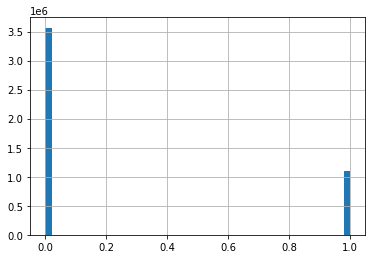

In [9]:
CSV['T_Limite'].hist(bins=50)

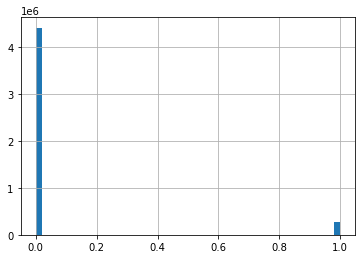

In [7]:
CSV['Semenov'].hist(bins=50)

<AxesSubplot:>

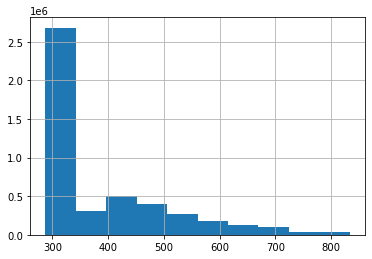

In [6]:
CSV['T_Reator'].hist(bins = 10) 

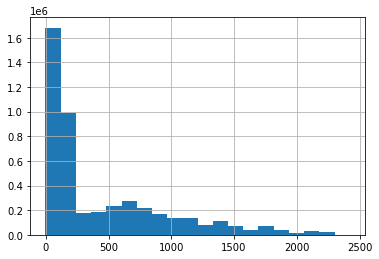

In [22]:
CSV['Qr'].hist(bins = 20)  # Calor removido

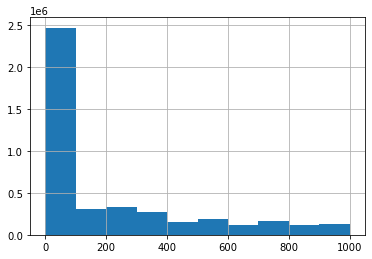

In [39]:
CSV['Qm'].hist(bins = 10, range=(0, 1000)) # Calor gerado

In [1]:
import av_utils

ModuleNotFoundError: No module named 'av_utils'

In [2]:
import numpy